<a href="https://colab.research.google.com/gist/Vidhi1290/c25b662327cdc18fed950e7465f7b959/simple-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Handling Missing values
    ♦ Data Exploratory Analysis
    ♦ Split the data into Train and Validation sets
    ♦ Build a simple linear regression model
    ♦ Interpret model results


### Problem Description

The given data has various attributes of a car, use linear regression approach to estimate price of the car with a combination of collected features. 


Price - The cost of the car

Country - The country in which the car is up for sale

Reliability - An ordinal metric for understanding the reliability of the car

Mileage - The fuel efficiency of the car

Type - A categorical variable defining the category to which the car belongs.

Weight - The weight of the car

Displacement - Represents the engine displacement of the car

HP - Horsepower of the car, a unit that measures it's power


### Data Reading

In [1]:
getwd()

[1] "/content"

In [2]:
## Load the data
cars_data  <- read.csv(file = "cars.csv")

### Data Understanding

Check the number of observations and attributes

Classify independent variables and dependent variable

In Linear Regression, the dependent variable is continuous variable.

For Simple Linear Regression we will predict dependent variable with one independent variable

For this example, we will consider the Price as dependent variable and the Displacement of the car as the independent variable.


In [3]:
dim(cars_data)

[1] 60  8

In [4]:
str(cars_data)

'data.frame':	60 obs. of  8 variables:
 $ Price      : int  8895 7402 6319 6635 6599 8672 7399 7254 9599 5866 ...
 $ Country    : chr  "USA" "USA" "Korea" "Japan/USA" ...
 $ Reliability: int  4 2 4 5 5 4 5 1 5 NA ...
 $ Mileage    : int  33 33 37 32 32 26 33 28 25 34 ...
 $ Type       : chr  "Small" "Small" "Small" "Small" ...
 $ Weight     : int  2560 2345 1845 2260 2440 2285 2275 2350 2295 1900 ...
 $ Disp.      : int  97 114 81 91 113 97 97 98 109 73 ...
 $ HP         : int  113 90 63 92 103 82 90 74 90 73 ...


In [5]:
head(cars_data)

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>
1,8895,USA,4,33,Small,2560,97,113
2,7402,USA,2,33,Small,2345,114,90
3,6319,Korea,4,37,Small,1845,81,63
4,6635,Japan/USA,5,32,Small,2260,91,92
5,6599,Japan,5,32,Small,2440,113,103
6,8672,Mexico,4,26,Small,2285,97,82


In [6]:
tail(cars_data)

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>
55,15395,USA,3,18,Van,3735,202,150
56,12267,USA,3,18,Van,3665,182,145
57,14944,Japan,5,19,Van,3735,181,150
58,14929,Japan,NA,20,Van,3415,143,107
59,13949,Japan,NA,20,Van,3185,146,138
60,14799,Japan,NA,19,Van,3690,146,106


### Summary Statistics

In [7]:
summary(cars_data)

     Price         Country           Reliability       Mileage     
 Min.   : 5866   Length:60          Min.   :1.000   Min.   :18.00  
 1st Qu.: 9932   Class :character   1st Qu.:2.000   1st Qu.:21.00  
 Median :12216   Mode  :character   Median :3.000   Median :23.00  
 Mean   :12616                      Mean   :3.388   Mean   :24.58  
 3rd Qu.:14933                      3rd Qu.:5.000   3rd Qu.:27.00  
 Max.   :24760                      Max.   :5.000   Max.   :37.00  
                                    NA's   :11                     
     Type               Weight         Disp.             HP       
 Length:60          Min.   :1845   Min.   : 73.0   Min.   : 63.0  
 Class :character   1st Qu.:2571   1st Qu.:113.8   1st Qu.:101.5  
 Mode  :character   Median :2885   Median :144.5   Median :111.5  
                    Mean   :2901   Mean   :152.1   Mean   :122.3  
                    3rd Qu.:3231   3rd Qu.:180.0   3rd Qu.:142.8  
                    Max.   :3855   Max.   :305.0   Max

### Data Type Conversion
Check if any data type conversions have to be done.


In [8]:
#Convert "Reliability" to factor variable
cars_data[, "Reliability"] <- as.factor(as.character(cars_data[, "Reliability"]))

In [9]:
cars_data[, "Country"] <- as.factor(as.character(cars_data[, "Country"]))
cars_data[, "Type"] <- as.factor(as.character(cars_data[, "Type"]))

In [10]:
str(cars_data)

'data.frame':	60 obs. of  8 variables:
 $ Price      : int  8895 7402 6319 6635 6599 8672 7399 7254 9599 5866 ...
 $ Country    : Factor w/ 8 levels "France","Germany",..: 8 8 5 4 3 6 4 5 3 3 ...
 $ Reliability: Factor w/ 5 levels "1","2","3","4",..: 4 2 4 5 5 4 5 1 5 NA ...
 $ Mileage    : int  33 33 37 32 32 26 33 28 25 34 ...
 $ Type       : Factor w/ 6 levels "Compact","Large",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Weight     : int  2560 2345 1845 2260 2440 2285 2275 2350 2295 1900 ...
 $ Disp.      : int  97 114 81 91 113 97 97 98 109 73 ...
 $ HP         : int  113 90 63 92 103 82 90 74 90 73 ...


### Handling Missing Values

In [11]:
## Look for Missing Values
sum(is.na(cars_data))

[1] 11

In [12]:
colSums(is.na(cars_data))

Price     Country Reliability     Mileage        Type      Weight 
          0           0          11           0           0           0 
      Disp.          HP 
          0           0

In [13]:
which(is.na(cars_data$Reliability))

[1] 10 21 22 23 34 45 49 54 58 59 60

In [43]:
## Imputing missing values

library(devtools)
install_github("cran/DMwR")
library(DMwR)
cars_data=centralImputation(cars_data)

Loading required package: usethis




bitops   (NA -> 1.0-7 ) [CRAN]
caTools  (NA -> 1.18.2) [CRAN]
gtools   (NA -> 3.9.4 ) [CRAN]
zoo      (NA -> 1.8-11) [CRAN]
xts      (NA -> 0.12.2) [CRAN]
gplots   (NA -> 3.1.3 ) [CRAN]
TTR      (NA -> 0.24.3) [CRAN]
ROCR     (NA -> 1.0-11) [CRAN]
abind    (NA -> 1.4-5 ) [CRAN]
quantmod (NA -> 0.4.20) [CRAN]


Installing 10 packages: bitops, caTools, gtools, zoo, xts, gplots, TTR, ROCR, abind, quantmod

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp6qugmV/remotes486f3ea2b1/cran-DMwR-6fd4f0c/DESCRIPTION’ ... OK
* preparing ‘DMwR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘DMwR_0.4.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [15]:
sum(is.na(cars_data))

[1] 11

### Data Exploratory Analysis

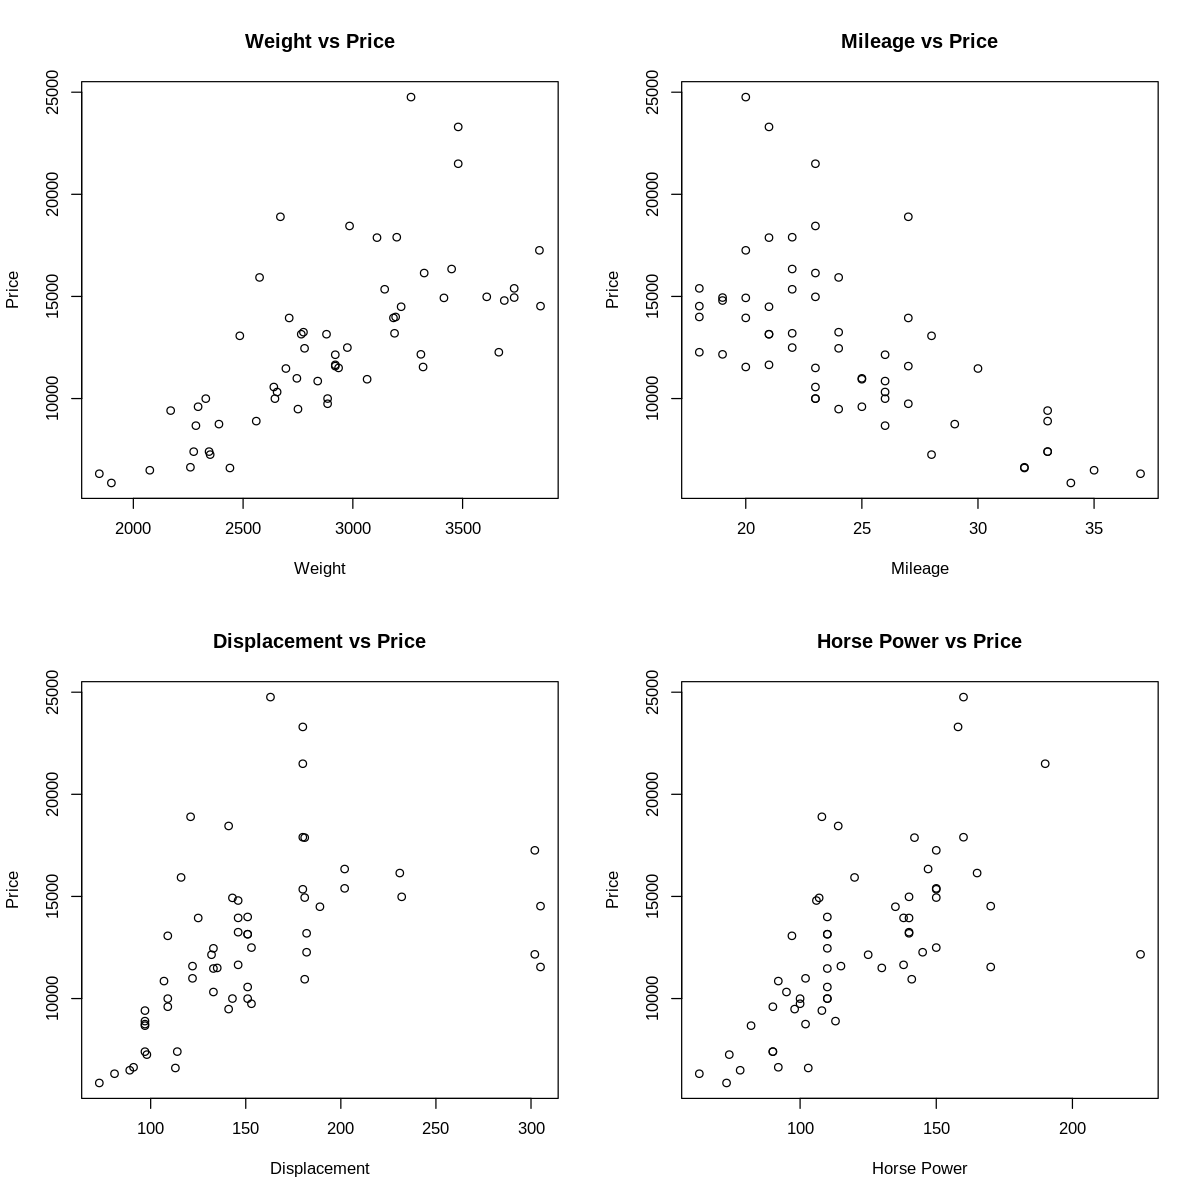

In [16]:
#Plot the Dependent and  Independent variables
# _*Scatter Plot*_ helps to view the relationship between two continuous variables

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2,2)) # Splits the plotting pane 2*2

plot(cars_data$Weight, cars_data$Price, xlab = "Weight", 
     ylab = "Price", main = "Weight vs Price")

plot(cars_data$Mileage, cars_data$Price, xlab = "Mileage",
     ylab = "Price", main = "Mileage vs Price")

plot(cars_data$Disp., cars_data$Price, xlab = "Displacement",
     ylab = "Price", main = "Displacement vs Price")

plot(cars_data$HP, cars_data$Price, xlab = "Horse Power", 
     ylab = "Price", main = "Horse Power vs Price")


,Price,Mileage,Weight,Disp.,HP
Price,1.0000000,-0.6537541,0.7017999,0.4856769,0.6536433
Mileage,-0.6537541,1.0000000,-0.8478541,-0.6931928,-0.6667146
Weight,0.7017999,-0.8478541,1.0000000,0.8032804,0.7629322
Disp.,0.4856769,-0.6931928,0.8032804,1.0000000,0.8181881
HP,0.6536433,-0.6667146,0.7629322,0.8181881,1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



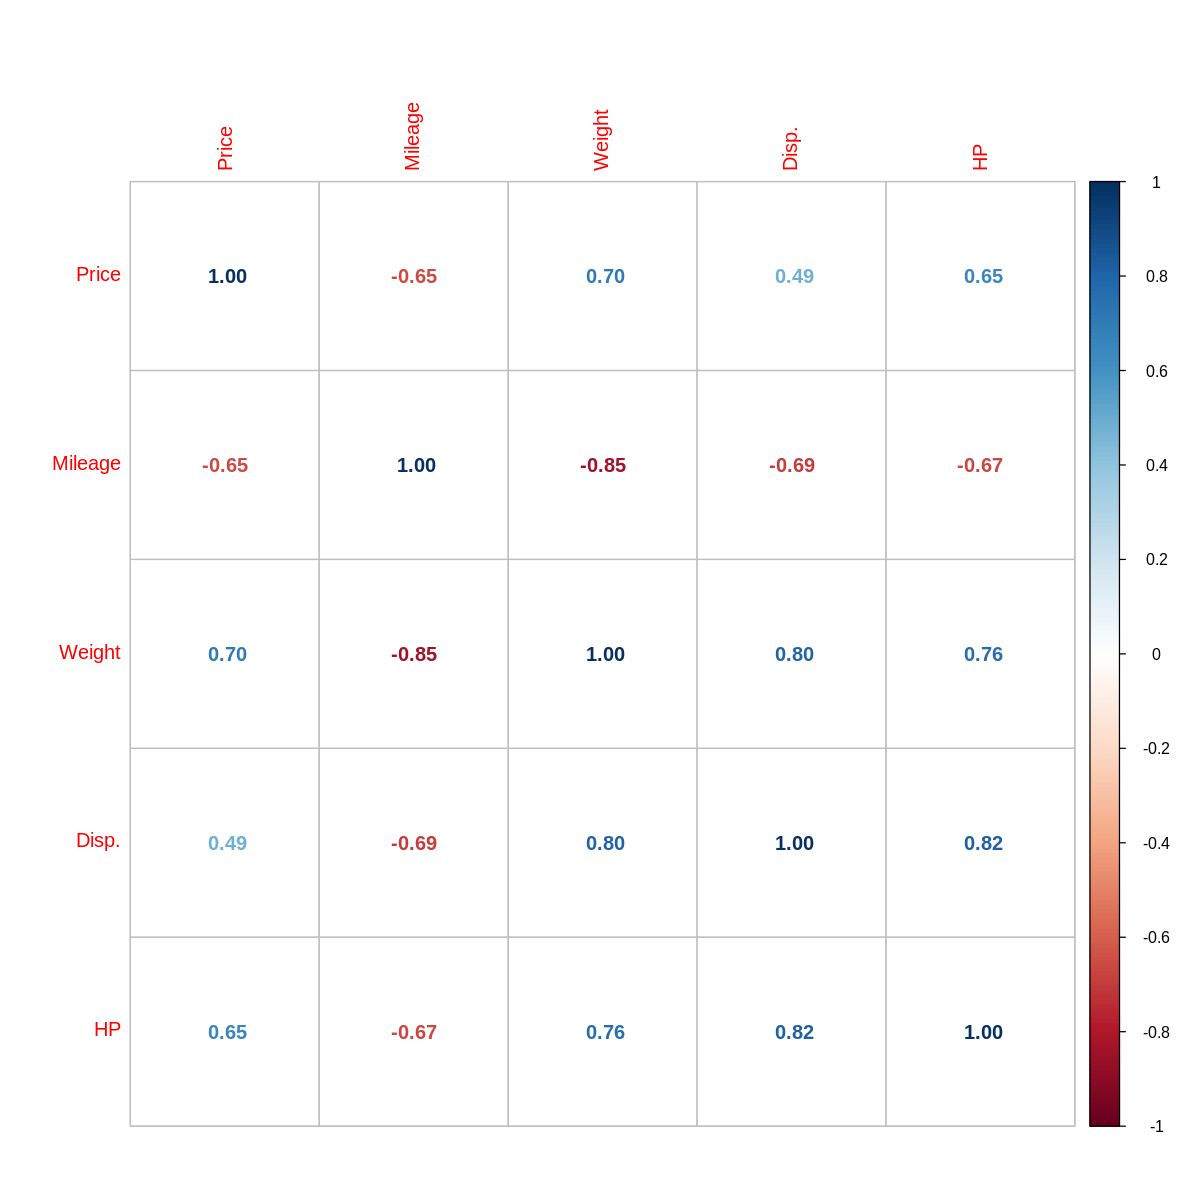

In [22]:
# Correlation can be calculated only for numerical attributes.
cor_data = cor(cars_data[,c("Price","Mileage","Weight","Disp.","HP")])      
# Correlation between independent and dependent variable
cor_data

# The values of correlation coefficient ranges from -1 to 1
## Corrplot

install.packages("corrplot")
library(corrplot)

par(mfrow = c(1,1))

corrplot(cor_data, method = "number")

### Split the data into Train and Validation sets

In [23]:
1:100

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

In [24]:
sample(1:100,size=10)

[1] 11 19 46 10 21 84 59 86 77 22

In [25]:
cars_data[c(1,10),]

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>
1,8895,USA,4,33,Small,2560,97,113
10,5866,Japan,NA,34,Small,1900,73,73


In [26]:
## Split row numbers into 2 sets
set.seed(1)
train_rows = sample(1:nrow(cars_data), size=0.7*nrow(cars_data))
validation_rows = setdiff(1:nrow(cars_data),train_rows)

In [27]:
train_rows

[1] 57  4 39  1 34 23 43 14 18 51 33 21 49 42 46 10  7  9 15 48 37 25 40 38 56
[26] 58 47 50 20  3  6 45 29 30 36 32 35 12 27  8 55 22

In [28]:
validation_rows

[1]  2  5 11 13 16 17 19 24 26 28 31 41 44 52 53 54 59 60

In [29]:
## Subset into Train and Validation sets
train_data <- cars_data[train_rows,]
validation_data <- cars_data[validation_rows,]

In [30]:
## View the dimensions of the data
dim(cars_data)
dim(train_data)
dim(validation_data)

[1] 60  8

[1] 42  8

[1] 18  8

### Build A Simple Linear Regression Model

In [31]:
names(train_data)

[1] "Price"       "Country"     "Reliability" "Mileage"     "Type"       
[6] "Weight"      "Disp."       "HP"

In [32]:
# lm function is used to fit linear models
LinReg = lm(Price ~ Disp., data = train_data)

### Interpret model results

In [33]:
## Summary of the linear model
summary(LinReg)

# Summary displays the following: 
# Formula given (Call) - Shows the function call used to compute the regression model.
# Residuals. Provide a quick view of the distribution of the residuals, which by definition have a mean zero.
# Coefficients and the test statistic values. Shows the regression beta coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.
# Residual Standard Error (RSE)
# Multiple R- Squared (which we generally refer to as R squared or Co-efficient of Determination)
# F statistic - Test for Model

# The statistical hypothesis is as follows :
# Null Hypothesis (H0):        the coefficients (slope) are equal to zero 
                               #(i.e., no relationship between x and y)
# Alternative Hypothesis (H1): the coefficients (slope) are not equal to zero 
                               #(i.e., there is some relationship between x and y)


Call:
lm(formula = Price ~ Disp., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9438.3 -2545.1  -661.7   458.2 11118.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5213.12    2014.97   2.587 0.013418 *  
Disp.          51.71      13.48   3.836 0.000434 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3840 on 40 degrees of freedom
Multiple R-squared:  0.2689,	Adjusted R-squared:  0.2507 
F-statistic: 14.72 on 1 and 40 DF,  p-value: 0.0004342


#### Try answering these questions (Interpreting model output) :

Is the Slope significant?

Is the Model significant?

What is the predictive power of the model (R-squared)?

In our example, both the p-values for the intercept and the predictor variable are highly significant, so we can reject the null hypothesis and accept the alternative hypothesis, which means that there is a significant association between the predictor and the outcome variables.

#### Regression line on top of data

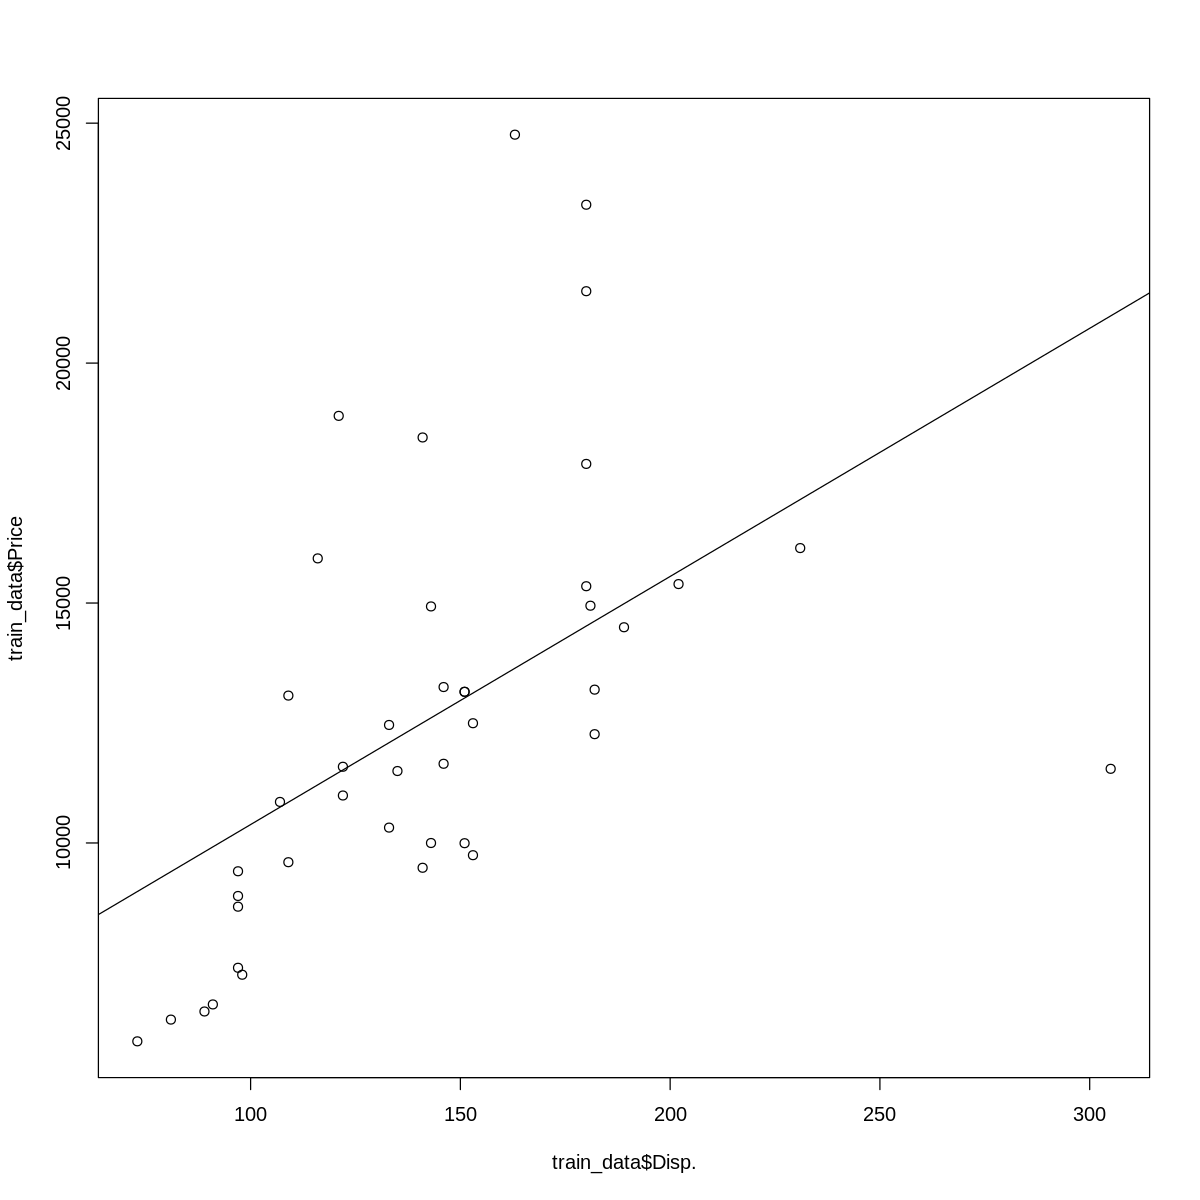

In [34]:
plot(train_data$Disp.,train_data$Price)

abline(LinReg)

#### Regression Equation
PredictedPrice = 5213.12 + 51.71 * Disp.

In [35]:
head(train_data)

,Price,Country,Reliability,Mileage,Type,Weight,Disp.,HP
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>
57,14944,Japan,5,19,Van,3735,181,150
4,6635,Japan/USA,5,32,Small,2260,91,92
39,13150,USA,3,21,Medium,2880,151,110
1,8895,USA,4,33,Small,2560,97,113
34,15930,France,NA,24,Compact,2575,116,120
23,18900,Germany,NA,27,Compact,2670,121,108


In [36]:
5213.12 + 51.71 * 181

[1] 14572.63

In [37]:
## Extracting residuals and fitted values
#  Target 
head(train_data$Price)
# To extract the predictions
head(as.numeric(LinReg$fitted.values))
# To extract the residuals:
head(as.numeric(LinReg$residuals))

[1] 14944  6635 13150  8895 15930 18900

[1] 14571.823  9918.324 13020.657 10228.557 11210.963 11469.490

[1]   372.1765 -3283.3240   129.3430 -1333.5573  4719.0373  7430.5095

In [38]:
14944 - 14571.823458939

[1] 372.1765